### Cho DataSet lấy từ file C62.csv của các hộ gồm các trường sau:  
- MaLo: mã lô đất  
- MatTien: đường mặt tiền (m) 
- DienTich: diện tích lô đất (m vuông)  
- LoaiDat: loại đất  Loại đất: 1/ 2/ x (x là số năm)_ đất nông nghiệp, đất không thời hạn, đất có thời hạn.  
- Dùng jupyter notebook (hoặc mã nguồn colab) để trả lời các câu hỏi sau.  (Đặt tên file: STT_HoVaTen_MSSV.ipynb và STT_HoVaTen_MSSV.pdf)  

### Câu 1 (3.0 điểm): 
- a. Đọc dữ liệu file trên vào DataFrame có tên df và hiển thị: 5 dòng đầu tiên, 5 dòng ngẫu nhiên, kích thước df, số dòng df, số cột df. 
- b. Thống kê có bao nhiêu lô đất nông nghiệp và đất đất không thời hạn và vẽ biểu đồ pie minh họa. 
- c. In ra giá trị thống kê trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm

In [1]:
import pandas as pd 
df = pd.read_csv("C62.csv")

# a 
print("5 dong dau tien: ", df.head())
print("5 dong ngau nhien: ", df.sample(5))
print("kich thuoc: ", df.shape)
print("so dong: ", df.shape[0])
print("so cot: ", df.shape[1])

5 dong dau tien:    MaLo  MatTien  DienTich  LoaiDat
0  Lô1        5       120        1
1  Lô2       10       200        2
2  Lô3        7       150       15
3  Lô4        8       180        1
4  Lô5        6       250        2
5 dong ngau nhien:      MaLo  MatTien  DienTich  LoaiDat
8    Lô9       12       400        1
13  Lô14        9       210        2
4    Lô5        6       250        2
15  Lô16       10       280        1
9   Lô10       11       350       25
kich thuoc:  (20, 4)
so dong:  20
so cot:  4


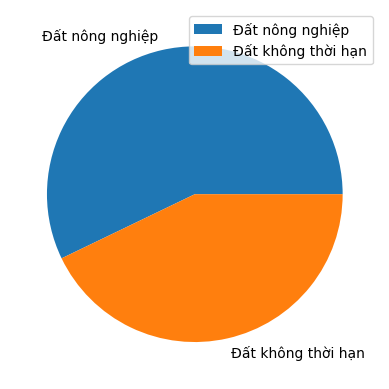

In [3]:
dat_nong_nghiep = df[df['LoaiDat'] == 1]['LoaiDat'].count()
dat_kth = df[df['LoaiDat'] == 2]['LoaiDat'].count()

import matplotlib.pyplot as plt 
plt.pie([dat_nong_nghiep, dat_kth], labels=['Đất nông nghiệp', 'Đất không thời hạn'])
plt.legend() # cái này thì dùng để tóm tắt 
plt.show()


Nhận xét: 
- Số lượng đất nông nghiệp chiếm phần đa

### Câu 2 (2.0 điểm):  Chèn thêm cột Tiền giá trị lô đất (TienGiaDat) (triệu) như sau: 
- Đất nông nghiệp: giá trị lô đất=Diện tích x 2; 
- đất ở không xác định thời hạn: giá trị lô đất =Diện tích lô đất x mặt tiền2, 
- đất có thời hạn: ghi “Không xác định giá trị”; 

In [6]:
def tinhGiaDat(row): 
    if row['LoaiDat'] == 1: 
        return row['DienTich'] * 2
    elif row['LoaiDat'] == 2: 
        return row['DienTich'] * (row['MatTien'] ** 2)
    else: 
        return "Không xác định"
# apply 
df['TienGiaDat'] = df.apply(tinhGiaDat, axis=1) # axis = 1 theo cột, axis = 0 theo dòng 

### Câu 3 (2.0 điểm):  Chèn thêm cột tiền Chuyển đổi đất (ChuyenDoi)= Diện tích x 15 (triệu).
- Trong đó chỉ chuyển đỗi đất nông nghiệp (LoaiDat=1),
- các loại đất khác thì ghi "Chưa có công văn"   
- Hãy trích lọc ra các lô đất được phép chuyển đổi.  

In [9]:
def chuyenDoiDat(row):
    if row['LoaiDat'] == 1: 
        return row['DienTich'] * 15 
    else: 
        return "Chưa có công văn"
# apply 
df['ChuyenDoi'] = df.apply(chuyenDoiDat, axis=1)
trich_loc = df[df['ChuyenDoi'] != 'Chưa có công văn']
print(trich_loc)

    MaLo  MatTien  DienTich  LoaiDat TienGiaDat ChuyenDoi
0    Lô1        5       120        1        240      1800
3    Lô4        8       180        1        360      2700
6    Lô7        4       100        1        200      1500
8    Lô9       12       400        1        800      6000
12  Lô13        7       190        1        380      2850
15  Lô16       10       280        1        560      4200
17  Lô18        6       170        1        340      2550
19  Lô20        8       160        1        320      2400


 ### Câu 4 (3.0 điểm):  
 - a. Giả sử Diện tích có phân phối chuẩn. Hãy xây dựng hàm mật độ xác suất Diện tích 
 - b. Vẽ đồ thị phân phối chuẩn cho Diện tích. Tinh chỉnh xlim, ylim cho đồ thị phù hợp 
 - c. Cho biết bao nhiêu phần trăm lô đất có Diện tích dưới 120 (m vuông). bạn tạo cho tôi tập dữ liệu để tôi thử sức. 

In [12]:
# a 
# hàm mật độ xác xuất là pdf  
import scipy.stats as stats
import numpy as np
# hàm mật độ ta cần truyền vào là x, trung bình và độ lệch chuẩn 
def ham_mat_do(x, mean, std): 
    return stats.norm.pdf(x, mean, std)

trung_binh = df['DienTich'].mean()
do_lech_chuan = df['DienTich'].std()
x = np.linspace(df['DienTich'].min(), df['DienTich'].max(), 100)
y = ham_mat_do(x, trung_binh, do_lech_chuan)

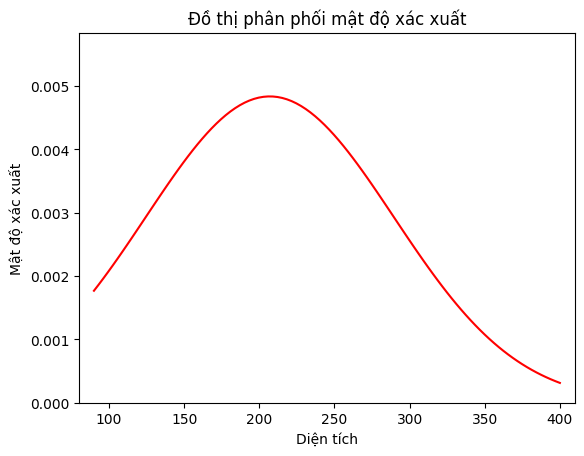

In [23]:
import matplotlib.pyplot as plt 
plt.plot(x, y, color='red')
plt.xlabel("Diện tích")
plt.ylabel("Mật độ xác xuất")
plt.title("Đồ thị phân phối mật độ xác xuất")
plt.xlim(df['DienTich'].min() - 10, df['DienTich'].max() + 10)
plt.ylim(0, max(y + 0.001))
plt.show()

In [24]:
# sử dụng cdf 
dien_tich_duoi_120 = stats.norm.cdf(120, trung_binh, do_lech_chuan)
print("Diên tích dưới 120 m^2", dien_tich_duoi_120)

Diên tích dưới 120 m^2 0.14572448071186322
